# Clone WaveRNN repo

In [1]:
# Clone the repo
# https://github.com/as-ideas/ForwardTacotron
# https://colab.research.google.com/github/as-ideas/ForwardTacotron/blob/master/notebooks/synthesize.ipynb#scrollTo=LHfPLGkqe-Jx
!git clone https://github.com/as-ideas/ForwardTacotron
# Checkout to latest version as of the time this notebook was created
!cd ForwardTacotron && git reset --hard "f537c5f16f9459948b64f563749d65dcedacbe04"

Cloning into 'ForwardTacotron'...
remote: Enumerating objects: 5473, done.
remote: Counting objects: 100% (1844/1844), done.
remote: Compressing objects: 100% (744/744), done.
remote: Total 5473 (delta 1342), reused 1512 (delta 1095), pack-reused 3629
Receiving objects: 100% (5473/5473), 205.55 MiB | 50.84 MiB/s, done.
Resolving deltas: 100% (3752/3752), done.
HEAD is now at f537c5f Update README.md


# Download data

In [ ]:
!wget "https://public-asai-dl-models.s3.eu-central-1.amazonaws.com/ForwardTacotron/wave_step575k.pt"

In [2]:
Size = "Smaller" #@param ["Full", "Small", "Smaller"]
if Size == "Full":
  vctk_dataset_path = "VCTK-Corpus/"
  archive_path="VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "VCTK-Corpus-small/"
  archive_path="VCTK-Corpus-small.7z"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x $archive_path
elif Size == "Smaller":
  vctk_dataset_path = "VCTK-Corpus-smaller/"
  archive_path="VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


--2021-12-03 23:08:56--  https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1
Resolving queensuca-my.sharepoint.com... 52.104.55.55
Connecting to queensuca-my.sharepoint.com|52.104.55.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/16drp4_queensu_ca/Documents/School%20Files/2021-2023,%20Masters/CISC%20867%20-%20Deep%20Learning/Datasets/VCTK-Corpus-smaller.tar.gz [following]
--2021-12-03 23:08:56--  https://queensuca-my.sharepoint.com/personal/16drp4_queensu_ca/Documents/School%20Files/2021-2023,%20Masters/CISC%20867%20-%20Deep%20Learning/Datasets/VCTK-Corpus-smaller.tar.gz
Reusing existing connection to queensuca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 556673395 (531M) [application/x-gzip]
Saving to: ‘VCTK-Corpus-smaller.tar.gz’

VCTK-Corpus-smaller 100%[===================>] 530.88M  60.2MB/s    in 8.8s    

2021-12-03 23:09:05 (60

In [3]:
# %cd /content/Project
# import sys
# import os.path
# sys.path.append("/content/Project")

/content/Project


In [4]:
!pip install librosa

     |████████████████████████████████| 203 kB 28.5 MB/s 
     |████████████████████████████████| 377 kB 70.8 MB/s 
     |████████████████████████████████| 323 kB 55.9 MB/s 
     |████████████████████████████████| 57 kB 1.4 MB/s 
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23140 sha256=7b430748f981c0bc331064e907d4430e55e8e67a00afaf1eba4c5bec57538d91
  Stored in directory: /home/azureuser/.cache/pip/wheels/de/14/0a/863e4ed680b3204444cf486733e609d7ff7abe8fceafab67dc
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=643cc043cf2b78ce2d767721a32dab0654127665ceb744eefe5ddc14c104c950
  Stored in directory: /home/azureuser/.cache/pip/wheels/cf/d4/04/49d8824a42bd9f9b11d502727965b9997f0d41d2b22ae4f645
Successfully built audioread resampy


# Create dataset

Matplotlib is building the font cache; this may take a moment.
/home/azureuser/dom/Project/data/VCTK.py:62: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168786/work/torch/csrc/utils/tensor_new.cpp:201.)
  return text, torch.tensor(clips), torch.tensor(spectros)


Please call Stella.
torch.Size([2, 25600])
torch.Size([2, 80, 129])


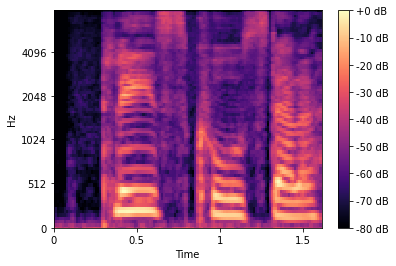

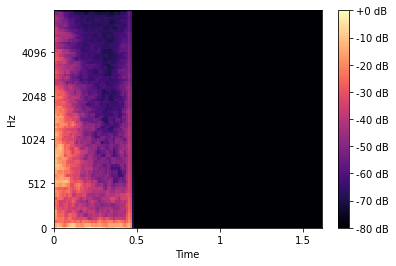

In [5]:
import importlib
import data.VCTK
import numpy as np
importlib.reload(data.VCTK) # prevent cache when making changes

dataset = data.VCTK.VCTKDataset(vctk_dataset_path)
text, clips, spectros = dataset[0]
print(text)
print(clips.shape)
print(spectros.shape)
dataset.show_spectros(spectros)

In [6]:
!pip install webrtcvad

     |████████████████████████████████| 66 kB 1.6 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp36-cp36m-linux_x86_64.whl size=30405 sha256=af03c172034352cfc3c5070a31d0a16636a5fc89d62d7492f5906b07cb745fe5
  Stored in directory: /home/azureuser/.cache/pip/wheels/ba/22/1c/d4e9707bbb27d469c384efc4263d8c7125219c1f088937289c
Successfully built webrtcvad


In [7]:
import model.model
importlib.reload(model.model) # prevent cache when making changes

model = model.model.FullModel()
# print(model)

text, clips, spectros = dataset[0]
clips = clips[:, :24800]
y_pred = model(clips, spectros)
print(y_pred.shape)

torch.Size([2, 24800]) torch.Size([2, 80, 128])
torch.Size([2, 24800, 512])


/anaconda/envs/azureml_py36_pytorch/lib/python3.6/site-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


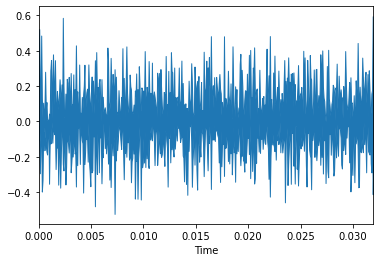

In [8]:
import librosa.display
librosa.display.waveplot(y_pred[0].detach().numpy(), sr=16000)

torch.Size([512, 24800])
torch.Size([24800])
wtf


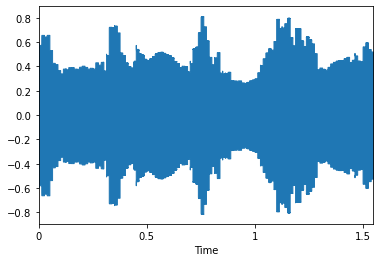

In [49]:
print(audio.shape)
maxed = audio.amax(dim=0)
print(maxed.shape)
dataset.show_audios([maxed])

In [53]:
import util.display
util.display.Audio(maxed.detach().numpy(), sr=16000)

In [60]:
import soundfile as sf
import pathlib
pathlib.Path("out").mkdir(exist_ok=True)
sf.write(file="out/a.wav", data=maxed.detach().numpy(), samplerate=16000)